In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.power import TTestPower, TTestIndPower, GofChisquarePower
from statsmodels.stats.proportion import proportions_chisquare
from statsmodels.stats.weightstats import ttest_ind
import statsmodels.api as sm

import scipy.stats

In [136]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/marketing_campaign_experiment/marketing-clean.csv")

In [137]:
raw_data.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,conversion
0,a100000040,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,1/18/18,House Ads,False,1
1,a100000041,1/1/18,House Ads,personalization,True,Arabic,Arabic,24-30 years,1/1/18,2/22/18,House Ads,False,1
2,a100000042,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,3/9/18,House Ads,False,1
3,a100000043,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,2/18/18,House Ads,False,1
4,a100000044,1/1/18,House Ads,personalization,True,Arabic,Arabic,24-30 years,1/1/18,3/3/18,House Ads,False,1


In [138]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              577 non-null    object
 1   date_served          577 non-null    object
 2   marketing_channel    577 non-null    object
 3   variant              577 non-null    object
 4   converted            577 non-null    bool  
 5   language_displayed   577 non-null    object
 6   language_preferred   577 non-null    object
 7   age_group            577 non-null    object
 8   date_subscribed      577 non-null    object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  577 non-null    object
 11  is_retained          577 non-null    bool  
 12  conversion           577 non-null    int64 
dtypes: bool(2), int64(1), object(10)
memory usage: 50.8+ KB


Lakukan eksplorasi dengan visual dan interpretasi pada data yang diberikan:

Jumlah user per marketing channel

Jumlah user per variant

Jumlah user converted per variant

Jumlah user converted per variant dari waktu ke waktu

Jumlah user converted per age group

Korelasi prefered language dan converted

In [139]:
# Jumlah userid per marketing channel
raw_data.groupby(["marketing_channel"])["user_id"].count()

marketing_channel
Email         53
Facebook     105
House Ads    258
Instagram    121
Push          40
Name: user_id, dtype: int64

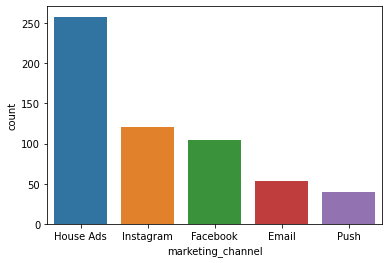

In [140]:
sns.countplot(data=raw_data, x="marketing_channel", order =raw_data["marketing_channel"].value_counts().index)

Jumlah user terbanyak berasal dari marketing channel House ads sebesar 258 user dan yang paling sedikit berasal dari push sebanyak 40 user.

In [141]:
raw_data.groupby(["marketing_channel"])["user_id"].nunique()

marketing_channel
Email         52
Facebook      94
House Ads    215
Instagram     97
Push          36
Name: user_id, dtype: int64

jika dilihat dari unik id untuk masing2 marketing channel ternyata berbeda jika hanya di count biasa. kita cek lebih jauh datanya.

In [142]:
# Cek duplikasi data
id=raw_data["user_id"]
dobel = raw_data[id.isin(id[id.duplicated()])].sort_values(by="user_id")
dobel

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,conversion
9,a100000059,1/2/18,House Ads,personalization,True,English,English,19-24 years,1/2/18,2/19/18,House Ads,False,1
10,a100000059,1/1/18,Facebook,personalization,False,English,English,19-24 years,1/2/18,2/19/18,House Ads,False,0
11,a100000060,1/2/18,House Ads,personalization,True,German,German,24-30 years,1/2/18,3/8/18,House Ads,False,1
12,a100000060,1/1/18,House Ads,personalization,False,German,German,24-30 years,1/2/18,3/8/18,House Ads,False,0
13,a100000061,1/2/18,House Ads,personalization,True,English,English,0-18 years,1/2/18,2/5/18,House Ads,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,a100001379,1/5/18,Push,control,False,English,English,36-45 years,1/14/18,3/15/18,Push,False,0
564,a100001380,1/15/18,Facebook,personalization,True,English,English,24-30 years,1/15/18,1/22/18,Facebook,False,1
565,a100001380,1/5/18,Facebook,control,False,English,English,45-55 years,1/15/18,1/22/18,Facebook,False,0
566,a100001381,1/16/18,Instagram,personalization,True,English,English,19-24 years,1/16/18,2/2/18,Instagram,False,1


Dari tabel di atas ternyata satu user_id bisa memiliki beberapa marketing channel, dimana akan terlihat apakah channel tersebut hasil conversion atau bukan dari kolom converted.

In [143]:
#cek kolom dengan userid, variant, marketing channel , dan converted yang sama

dobel2= raw_data[raw_data.duplicated(["user_id","marketing_channel","variant","converted"], keep = False)]
dobel2

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,conversion
309,a100000889,1/3/18,House Ads,control,False,English,English,45-55 years,1/3/18,3/24/18,Email,False,0
311,a100000889,1/3/18,House Ads,control,False,English,English,45-55 years,1/3/18,3/24/18,Email,False,0
314,a100000890,1/4/18,House Ads,control,False,English,English,55+ years,1/4/18,1/11/18,Push,False,0
316,a100000890,1/3/18,House Ads,control,False,English,English,55+ years,1/4/18,1/11/18,Push,False,0
319,a100000891,1/5/18,House Ads,control,False,English,English,0-18 years,1/5/18,3/17/18,Facebook,False,0
321,a100000891,1/3/18,House Ads,control,False,English,English,0-18 years,1/5/18,3/17/18,Facebook,False,0
327,a100000893,1/7/18,Instagram,control,True,English,English,19-24 years,1/7/18,4/1/18,Instagram,False,1
328,a100000893,1/11/18,Instagram,control,True,English,English,24-30 years,1/7/18,4/1/18,Instagram,False,1
330,a100000893,1/2/18,House Ads,control,False,English,English,19-24 years,1/7/18,4/1/18,Instagram,False,0
331,a100000893,1/3/18,House Ads,control,False,English,English,24-30 years,1/7/18,4/1/18,Instagram,False,0


In [144]:
# data yang dobel di atas kita keep satu yang unik, raw_data yang unique ada 567 baris
raw_data = raw_data.drop_duplicates(["user_id","marketing_channel","variant","converted"],keep="first")
raw_data

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,conversion
0,a100000040,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,1/18/18,House Ads,False,1
1,a100000041,1/1/18,House Ads,personalization,True,Arabic,Arabic,24-30 years,1/1/18,2/22/18,House Ads,False,1
2,a100000042,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,3/9/18,House Ads,False,1
3,a100000043,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,2/18/18,House Ads,False,1
4,a100000044,1/1/18,House Ads,personalization,True,Arabic,Arabic,24-30 years,1/1/18,3/3/18,House Ads,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,a100007286,1/17/18,Email,control,True,German,German,19-24 years,1/17/18,3/5/18,Email,False,1
573,a100007287,1/17/18,Email,control,True,German,German,24-30 years,1/17/18,2/14/18,Email,False,1
574,a100007288,1/17/18,Email,control,True,German,German,30-36 years,1/17/18,4/26/18,Email,False,1
575,a100007289,1/17/18,Email,control,True,German,German,36-45 years,1/17/18,1/27/18,Email,False,1


Karena datanya sudah kita drop yang dobel, maka kita ulangi dari pertanyaan pertama.

In [145]:
# 1. Jumlah userid per marketing channel, karena ada user-id yang marketing channel nya sama tapi variantnya berbeda, kita drop user dengan dobel marketing channel.
raw_data1 = raw_data.drop_duplicates(["user_id","marketing_channel"],keep="first")
raw_data1.groupby(["marketing_channel"])["user_id"].count()

marketing_channel
Email         52
Facebook      94
House Ads    215
Instagram     97
Push          36
Name: user_id, dtype: int64

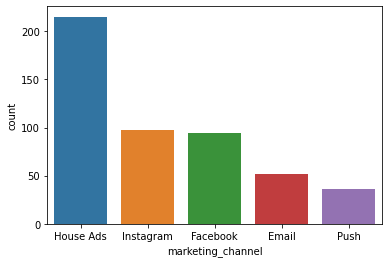

In [146]:
sns.countplot(data=raw_data1, x="marketing_channel", order =raw_data["marketing_channel"].value_counts().index)

House Ads adalah marketing channel yang punya userID terbanyak yaitu 215 user_id. 

In [147]:
# 2. Jumlah userid per variant
raw_data2 = raw_data.drop_duplicates(["user_id","variant"],keep="first")
raw_data2.groupby(["variant"])["user_id"].count()

variant
control            225
personalization    247
Name: user_id, dtype: int64

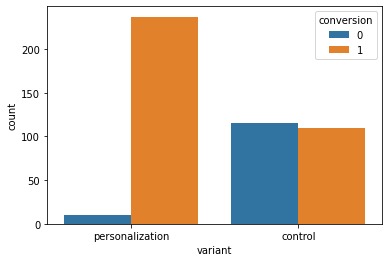

In [151]:
# 3. Jumlah user converted per variant
sns.countplot(data=raw_data2, x="variant",hue = "conversion" )

In [149]:
raw_data2.groupby(["variant","conversion"])["user_id"].count()

variant          conversion
control          0             115
                 1             110
personalization  0              10
                 1             237
Name: user_id, dtype: int64

secara total antara peronalization dan control jumlahnya hampir sama, namun variant peronalization mostly adalah user yang convert.

In [152]:
from datetime import datetime
# 4. Jumlah user converted per variant dari waktu ke waktu
convert_user =raw_data2[raw_data2["conversion"] == 1]
convert_user["date_served"] =pd.to_datetime(convert_user["date_served"])
raw_data3= convert_user.groupby(["date_served","variant","conversion",]).size().reset_index(name='counts_userID')
raw_data3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,date_served,variant,conversion,counts_userID
0,2018-01-01,personalization,1,8
1,2018-01-02,personalization,1,11
2,2018-01-03,control,1,1
3,2018-01-03,personalization,1,8
4,2018-01-04,control,1,8
5,2018-01-04,personalization,1,10
6,2018-01-05,control,1,10
7,2018-01-05,personalization,1,7
8,2018-01-06,control,1,2
9,2018-01-06,personalization,1,7


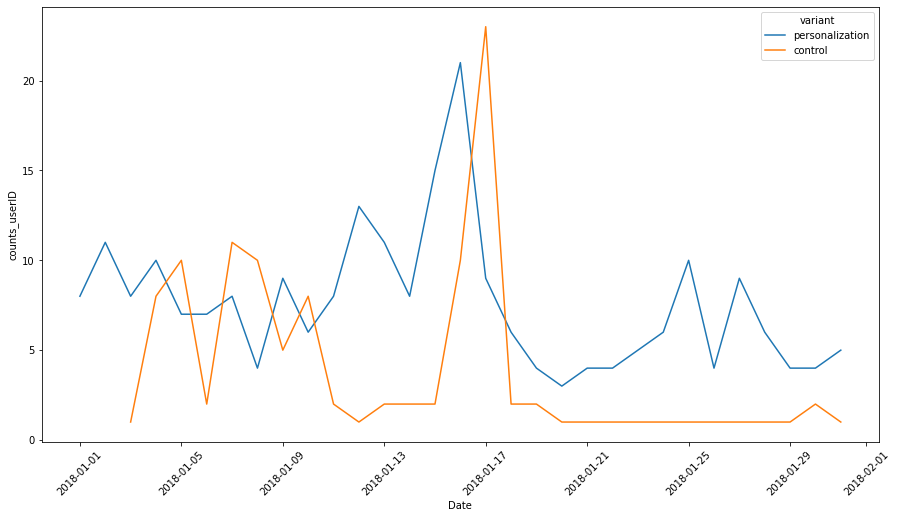

In [153]:
plt.figure(figsize=(15,8))
sns.lineplot(data=raw_data3, x="date_served", y="counts_userID" ,hue="variant")
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.show()

Jumlah userid yang converted paling banyak di sekitar tanggl 16-17 Januari untuk kedua variant.

In [154]:
# 5. Jumlah user converted per age group 
# kita cek lebih dulu adakah satu user yang punya lebih dari satu category group
check_age= convert_user.groupby(["user_id","age_group"]).size().reset_index(name='counts_userID')
id=check_age["user_id"]
dobel_age = check_age[id.isin(id[id.duplicated()])].sort_values(by="user_id")
dobel_age

,user_id,age_group,counts_userID
217,a100000875,19-24 years,1
218,a100000875,45-55 years,1
219,a100000888,19-24 years,1
220,a100000888,36-45 years,1
222,a100000890,0-18 years,1
223,a100000890,55+ years,1
224,a100000891,0-18 years,1
225,a100000891,19-24 years,1
226,a100000892,19-24 years,1
227,a100000892,24-30 years,1


ada 10 user id yang punya dobel age. karena cuma 10 data userid ini kita hapus saja agar datanya lebih valid.

In [155]:
#check_age
check_age_convert_user = check_age.drop_duplicates(["user_id"], keep=False)
dobel_age = check_age_convert_user[id.isin(id[id.duplicated()])].sort_values(by="user_id")
dobel_age

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,user_id,age_group,counts_userID


In [156]:
check_age_convert_user.groupby(["age_group"]).count()

,user_id,counts_userID
age_group,,
0-18 years,64,64
19-24 years,91,91
24-30 years,76,76
30-36 years,24,24
36-45 years,28,28
45-55 years,29,29
55+ years,25,25


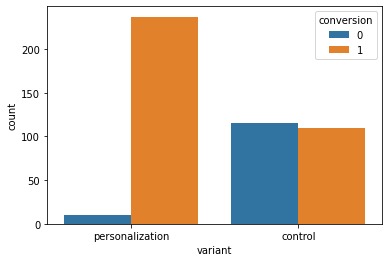

In [159]:
# 7. Lakukan pengujian A/B testing untuk menunjukkan bahwa terdapat perbedaan signifikan berdasarkan jumlah konversi antara iklan baru dengan iklan lama. 
sns.countplot(data=raw_data2, x="variant",hue = "conversion" )

In [160]:
# kalkulasi conversion untuk masing-masing variant
conv_calculation = raw_data2.groupby(
    ['variant', 'converted'], as_index = False
).size().pivot(
    index='variant', columns = "converted", values = "size"
).reset_index().assign(
    conv_percent = lambda x: x[True] * 100 / (x[True] + x[False])
).assign(
    total_sample = lambda x: x[True] + x[False]
)

In [161]:
conv_calculation

converted,variant,False,True,conv_percent,total_sample
0,control,115,110,48.888889,225
1,personalization,10,237,95.951417,247


In [162]:
#Calculate uplift of personalization	

conv_control = conv_calculation[conv_calculation['variant'] == 'control']['conv_percent'].values
conv_personalization = conv_calculation[conv_calculation['variant'] == 'personalization']['conv_percent'].values

In [164]:
(conv_personalization - conv_control)*100/conv_control

array([96.26426205])

Terlihat ada uplift sebesar 96.2 %

In [171]:
# Chi Square Test

# find number of succession
success = conv_calculation[['total_sample', True]].values[:,1]
# find number of all observations
obs = conv_calculation[['total_sample', True]].values[:,0]

In [167]:
success

array([110, 237])

In [168]:
obs

array([225, 247])

In [172]:
result = proportions_chisquare(success, obs)

In [173]:
# Calculate chi squared result
print('X-squared: %.3f' % result[0])
print('p-value: %.3f' % result[1])

X-squared: 133.947
p-value: 0.000


Interpretation

Variant **control** memiliki 110 conversions dibanding variant **personalization** memiliki 237

Relative uplift dari variant **personalization** (95,9%) dari variant **control** (48,9%) sekitar 96,2%

p-value < 0.05, bahwa terdapat perbedaan significant antara iklan baru dan iklan lama. 

dalam hal ini null hipotesis tertolak dan akan memproses variant **personalization** untuk semua user